<a href="https://colab.research.google.com/github/sbogde/pandamonium/blob/main/dmi_03_amazon_reviews_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import requests
from bs4 import BeautifulSoup
import csv
import pandas as pd
import time
import warnings

time.sleep(12)
warnings.filterwarnings('ignore')

In [3]:
## Define URLs for Scraping Amazon Reviews
urls = [
    'https://www.amazon.co.uk/dp/B0C2PRHCD3',
    'https://www.amazon.co.uk/dp/B0CYZH3D7Y',
    'https://www.amazon.co.uk/dp/B0D2D66R82',
    'https://www.amazon.co.uk/dp/B0DP1YVFQL',
    'https://www.amazon.co.uk/dp/B0DK1KK1FM'
]

In [4]:
reviews_list = []
ratings_list = []

# Iterate over each movie URL
for url in urls:
    print(f"Scraping: {url}")
    headers = {'User-Agent': 'Mozilla/5.0'}  # Prevent getting blocked
    page = requests.get(url, headers=headers)

    print(f"page: {page}\n")
    # print(f"page.content,: {page.content}\n")

    # Parse the page content
    soup = BeautifulSoup(page.content, 'html.parser')

    # Find all review containers
    review_containers = soup.find_all('li', class_='review aok-relative')
    # print(f"review_containers: {review_containers}\n")

    # Extract review text and rating
    for container in review_containers:
        # Extract rating
        rating_element = container.find('span', class_='a-icon-alt')
        print(f"rating_element: {rating_element}\n")

        rating = int(float(rating_element.get_text(strip=True).split()[0])) if rating_element else 0
        print(f"rating: {rating}\n")

        # Extract review text
        review_element = container.find('div', class_='a-expander-content reviewText review-text-content a-expander-partial-collapse-content')
        # print(f"review_element: {review_element}\n")

        review_text = review_element.get_text(strip=True) if review_element else "No Review"
        # print(f"review_text: {review_text}\n")

        # Append to lists
        reviews_list.append(review_text)
        ratings_list.append(rating)

        # print(f"Review: {review_text[:100]}...")  # Print preview
        # print(f"Rating: {rating}\n")

    # Sleep to prevent being blocked
    time.sleep(20)

ratings_list

Scraping: https://www.amazon.co.uk/dp/B0C2PRHCD3
page: <Response [500]>

Scraping: https://www.amazon.co.uk/dp/B0CYZH3D7Y
page: <Response [200]>

Scraping: https://www.amazon.co.uk/dp/B0D2D66R82
page: <Response [200]>

rating_element: <span class="a-icon-alt">5.0 out of 5 stars</span>

rating: 5

rating_element: <span class="a-icon-alt">5.0 out of 5 stars</span>

rating: 5

rating_element: <span class="a-icon-alt">5.0 out of 5 stars</span>

rating: 5

Scraping: https://www.amazon.co.uk/dp/B0DP1YVFQL
page: <Response [500]>

Scraping: https://www.amazon.co.uk/dp/B0DK1KK1FM
page: <Response [500]>



[5, 5, 5]

In [5]:
# print(reviews_list[1], "   ", ratings_list[1])
ratings_list

[5, 5, 5]

In [6]:
amazon_df = pd.DataFrame({'Review': reviews_list, 'Rating': ratings_list})

# Save to CSV
amazon_df.to_csv('amazon_reviews_dataset.csv', index=False)

# Display first few rows
print(amazon_df.head())
print(amazon_df.info())

                                              Review  Rating
0  I’ve been thoroughly impressed with the Roboro...       5
1  Having spent several h̶o̶u̶r̶s̶ days researchi...       5
2  What can I say, I really love it!Is a game cha...       5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  3 non-null      object
 1   Rating  3 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 180.0+ bytes
None


In [7]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# text = ', '.join(t for t in comments)
# #print(text)
# stopwords = set(STOPWORDS)
# wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(text)

# plt.figure(figsize=(10,6))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.show()

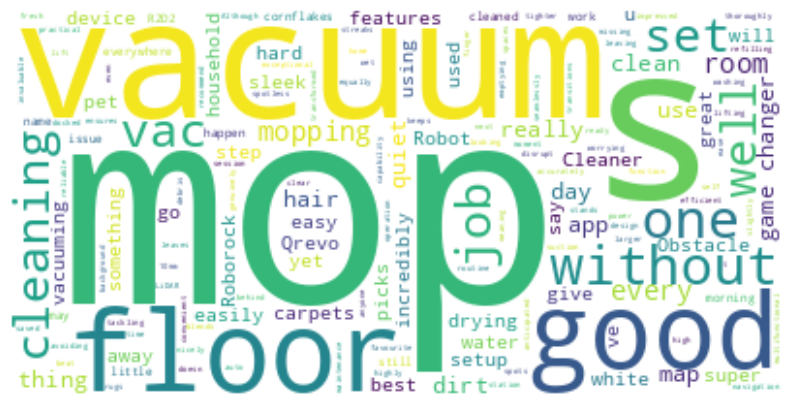

In [8]:
### WordCloud Visualization
text = ', '.join(t for t in amazon_df['Review'])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(text)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [27]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [28]:
#https://www.geeksforgeeks.org/python-sentiment-analysis-using-vader/
sid_obj = SentimentIntensityAnalyzer()
# sentiment_dict = sid_obj.polarity_scores("It tries to engage the people who are watching it. It tries to suprise people, however, this film is not interesting")
# #sentiment_dict = sid_obj.polarity_scores("I love this film. It is wonderful!")
# #sentiment_dict = sid_obj.polarity_scores("I am not sure about this film, no idea!")
# print("Overall sentiment dictionary is : ", sentiment_dict)
# print("Sentence was rated as ", sentiment_dict['neg']*100, "% Negative")
# print("Sentence was rated as ", sentiment_dict['neu']*100, "% Neutral")
# print("Sentence was rated as ", sentiment_dict['pos']*100, "% Positive")

# print("Sentence Overall Rated As", end=" ")

#     # Decide sentiment as positive, negative, or neutral
# if sentiment_dict['compound'] >= 0.05 :
#     print("Positive")
# elif sentiment_dict['compound'] <= -0.05 :
#     print("Negative")
# else :
#     print("Neutral")

In [29]:
#use this when you have an offline dataset
#movie =  pd.read_csv("F:\A-universities\WLV\workshop\Workshop3_IMDB_Dataset.csv")
#print(movie.head())
#print(movie.info())
if 'google.colab' in str(get_ipython()):
    from google.colab import drive, data_table
    drive.mount('/content/drive', force_remount=True)
    file_path = '/content/drive/My Drive/Colab Notebooks/data-mining/data/Musical_instruments_reviews.csv'
    data_table.enable_dataframe_formatter()
else:
    file_path = './data/Musical_instruments_reviews.csv'  # Local path

Mounted at /content/drive


In [30]:
# Let's take the dataset's pulse
df = pd.read_csv(file_path)

# Display the first row of the dataset
df.head(3)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"


In [31]:
print("Columns in the CSV:", df.columns.tolist())

Columns in the CSV: ['reviewerID', 'asin', 'reviewerName', 'helpful', 'reviewText', 'overall', 'summary', 'unixReviewTime', 'reviewTime']


In [32]:
df.rename(columns={'reviewText': 'Review'}, inplace=True)

df['Review'] = df['Review'].fillna("")

def extract_rating(r):
    try:
        return int(float(r.split()[0]))
    except:
        return 0

df['Rating'] = df['overall'].apply(extract_rating)

print(df[['Review', 'Rating']].head())

                                              Review  Rating
0  Not much to write about here, but it does exac...       0
1  The product does exactly as it should and is q...       0
2  The primary job of this device is to block the...       0
3  Nice windscreen protects my MXL mic and preven...       0
4  This pop filter is great. It looks and perform...       0


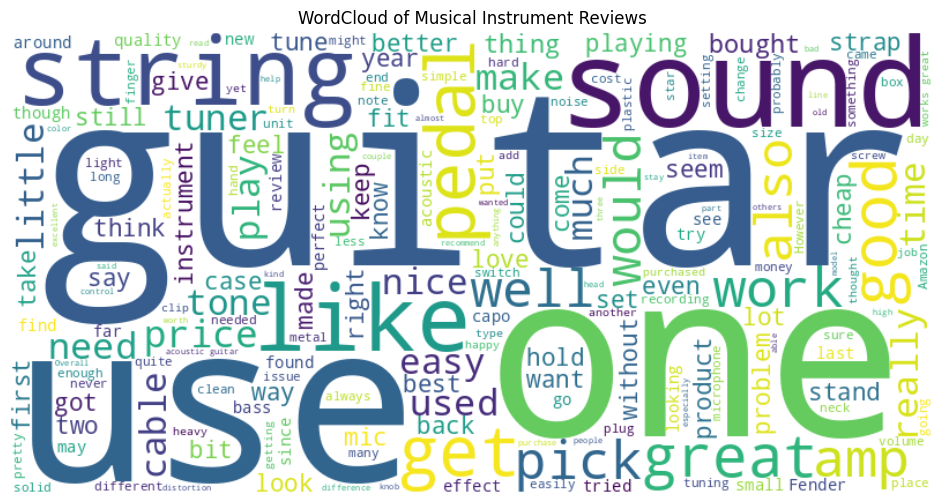

In [33]:
# Concatenate all reviews into one large text string
all_reviews_text = " ".join(df['Review'])

# Define English stopwords
# stop_words = set(stopwords.words('english'))
stop_words = set(nltk.corpus.stopwords.words('english'))


# Create and display a WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words).generate(all_reviews_text)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud of Musical Instrument Reviews")
plt.show()


In [18]:
# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Calculate the compound sentiment score for each review
df['Compound'] = df['Review'].apply(lambda x: sid.polarity_scores(x)['compound'])

# Label sentiment based on the compound score thresholds
def label_sentiment(score):
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df['Sentiment'] = df['Compound'].apply(label_sentiment)
print(df[['Review', 'Compound', 'Sentiment']].head(10))


                                              Review  Compound Sentiment
0  Not much to write about here, but it does exac...    0.6903  positive
1  The product does exactly as it should and is q...    0.9588  positive
2  The primary job of this device is to block the...   -0.7003  negative
3  Nice windscreen protects my MXL mic and preven...    0.5859  positive
4  This pop filter is great. It looks and perform...    0.7650  positive
5  So good that I bought another one.  Love the h...    0.6848  positive
6  I have used monster cables for years, and with...   -0.2263  negative
7  I now use this cable to run from the output of...    0.6586  positive
8  Perfect for my Epiphone Sheraton II.  Monster ...    0.7940  positive
9  Monster makes the best cables and a lifetime w...    0.9086  positive


In [13]:
# Convert Rating to string first, then replace non-numeric values safely
movie['Rating'] = pd.to_numeric(movie['overall'], errors='coerce')
#NaN represents missing or undefined data
# Fill NaN values with a default value (e.g., 0) before converting to integer
movie['Rating'] = movie['Rating'].fillna(0).astype(int)

movie.rename(columns={'reviewText': 'Review'}, inplace=True)

movie.head(3)


NameError: name 'movie' is not defined

In [ ]:
print("Columns in the CSV:", movie.columns.tolist())

In [ ]:
import string
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split


##Sentiment Identification using VADER

import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
sentiments = []

for review in movie['Review']:
    score = sid.polarity_scores(review)['compound']
    if score >= 0.05:
        sentiments.append('positive')
    elif score <= -0.05:
        sentiments.append('negative')
    else:
        sentiments.append('neutral')

movie['Sentiment'] = sentiments

## Sentiment Classification using Machine Learning

movie['class-label'] = movie['Rating'].astype(int).apply(lambda x: '1' if x > 5 else ('-1' if x < 5 else '0'))
movie = movie[movie['class-label'] != '0']

#movie.to_csv('f:\myfile1.csv', index=False)
#analyzer is used to set the level of processing, it can be a character or a word level, 'word' or 'char'
#stop_words can provide you with a list of words that have to be removed from the data before calculations;
tfidf_vectorizer = TfidfVectorizer(analyzer='word', stop_words='english')
#Once you've created a vectorizer instance, it's time to obtain a TF-IDF matrix.
#You can use the fit_transform() class method and shape to print out its dimension:
X = tfidf_vectorizer.fit_transform(movie['Review'])
#print(f"Matrix dimension: {tfidf_matrix.shape}")
print(f"Matrix dimension: {X.shape}")
y = movie['class-label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8)

## Train and Evaluate SVM Classifier



In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

svc = SVC(kernel='sigmoid', gamma=1.0)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Not Approved", "Approved"])
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()

#print('Confusion Matrix:', confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

#How to interprete these metrics?
#https://www.statology.org/sklearn-classification-report/

In [ ]:
## Train and Evaluate Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Not Approved", "Approved"])
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()

#print('Confusion Matrix:', confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
#https://www.kaggle.com/datasets/columbine/imdb-dataset-sentiment-analysis-in-csv-format
#use this when you have an offline dataset
# movie1 =  pd.read_csv("F:\A-universities\WLV\workshop\Week 3\IMDB\Valid.csv")

if 'google.colab' in str(get_ipython()):
    from google.colab import drive, data_table
    drive.mount('/content/drive', force_remount=True)
    file_path = '/content/drive/My Drive/Colab Notebooks/data-mining/data/Musical_instruments_reviews.csv'
    data_table.enable_dataframe_formatter()
else:
    file_path = './data/Musical_instruments_reviews.csv'  # Local path

movie1 = pd.read_csv(file_path)

print(movie1.head())
print(movie.info())

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

text = ', '.join(str(t) for t in movie1['reviewText'])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(text)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
import string
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split


##Sentiment Identification using VADER

import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
sentiments = []

for review in movie1['reviewText']:
    if not isinstance(review, str):
        review = ""
    score = sid.polarity_scores(review)['compound']
    if score >= 0.05:
        sentiments.append('positive')
    elif score <= -0.05:
        sentiments.append('negative')
    else:
        sentiments.append('neutral')

movie1['Sentiment'] = sentiments

## Sentiment Classification using Machine Learning
movie1['reviewText'] = movie1['reviewText'].fillna("")


# movie1.to_csv('f:\myfile1.csv', index=False)
#analyzer is used to set the level of processing, it can be a character or a word level, 'word' or 'char'
#stop_words can provide you with a list of words that have to be removed from the data before calculations;
tfidf_vectorizer = TfidfVectorizer(analyzer='word', stop_words='english')
#Once you've created a vectorizer instance, it's time to obtain a TF-IDF matrix.
#You can use the fit_transform() class method and shape to print out its dimension:
X = tfidf_vectorizer.fit_transform(movie1['reviewText'])
#print(f"Matrix dimension: {tfidf_matrix.shape}")
print(f"Matrix dimension: {X.shape}")
y = movie1['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8)

## Train and Evaluate SVM Classifier



In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

svc = SVC(kernel='sigmoid', gamma=1.0)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))


#How to interprete these metrics?
#https://www.statology.org/sklearn-classification-report/

In [ ]:

# Confusion Matrix
# conf_matrix = confusion_matrix(y_test, y_pred)
# disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Not Approved", "Approved"])
# disp.plot(cmap='Blues', values_format='d')
# plt.title("Confusion Matrix")
# plt.show()

#print('Confusion Matrix:', confusion_matrix(y_test, y_pred))
#print(classification_report(y_test, y_pred))